# <center> R1.13 introduction à Python <br> TP3- algorithmes de recherche et de tri, complexité </center>
<center> 2023/2024 - Thibault Godin </center>
<center> IUT de Vannes, BUT Informatique </center>

***

Le but principal de ce TP est de reprendre le TP R1.01 Java en implémentant quelques algorithmes de recherche et de tri, puis en traçant les complexités empiriques.

On en profitera faire quelques animations

In [40]:
import matplotlib.pyplot as plt

#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline
#%matplotlib notebook
#figures interactives

plt.rcParams['figure.figsize'] = (12, 12)

#taille des figures (en pouces)


import random


from IPython.display import HTML
#animation des figures

cpt = 0

-----------------


# 1-  Complexités de références


Dans ce TP on va utiliser la librairie classique permettant de tracer des courbes en Python, `matplotlib`

## Complexité, $\Theta(n)$ : approche graphique :

On rappelle que $f(n) = \Theta(g(n)) \equiv   C_1 g(n) \leq f(n) \leq C_2 g(n)$ pour $n$ assez grand.

Notre but va être de comparer des fonctions/suite (complexités) avec des fonctions de références : 

- $\log_2(n)$ (complexité logarithmique)
- $n$ (complexité linéaire)
- $n . \log_2(n)$ (complexité linéarithmique)
- $n^2$ (complexité quadratique)
- $n^3$ (complexité cubique)

>**_question 1_**<br>
Prendre le temps de regarder les fonctions `logarithmic` `linear` `linearithmic` `quadratic` et `cubic` qui prennent en entrée une liste et  renvoient la fonction associée appliquée à cette liste.

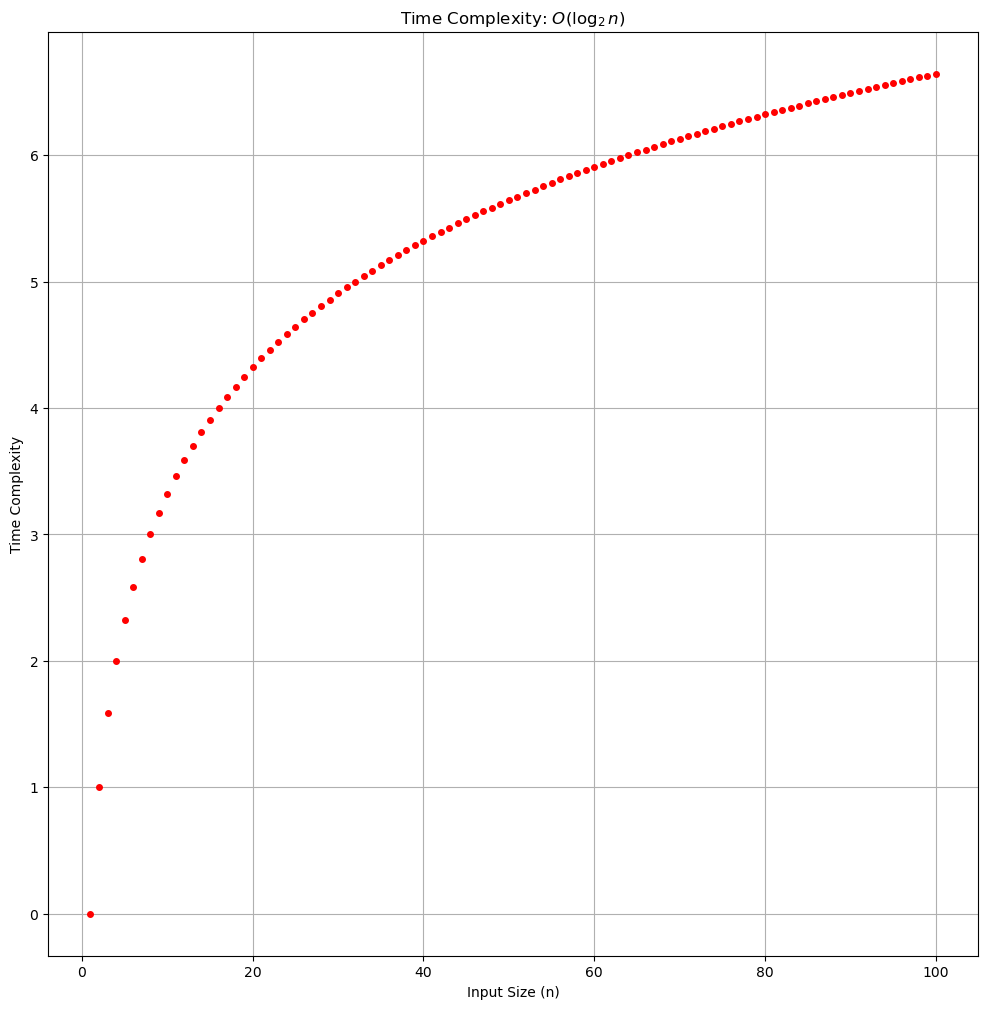

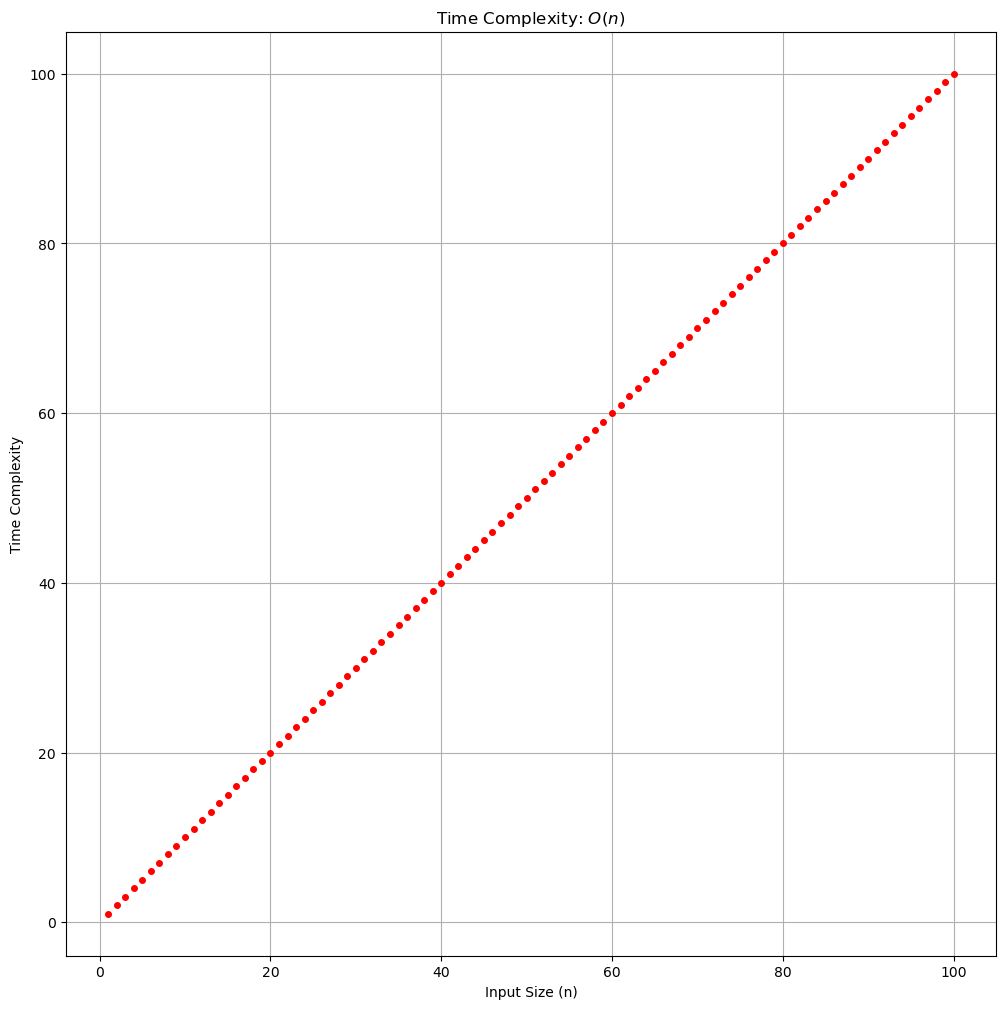

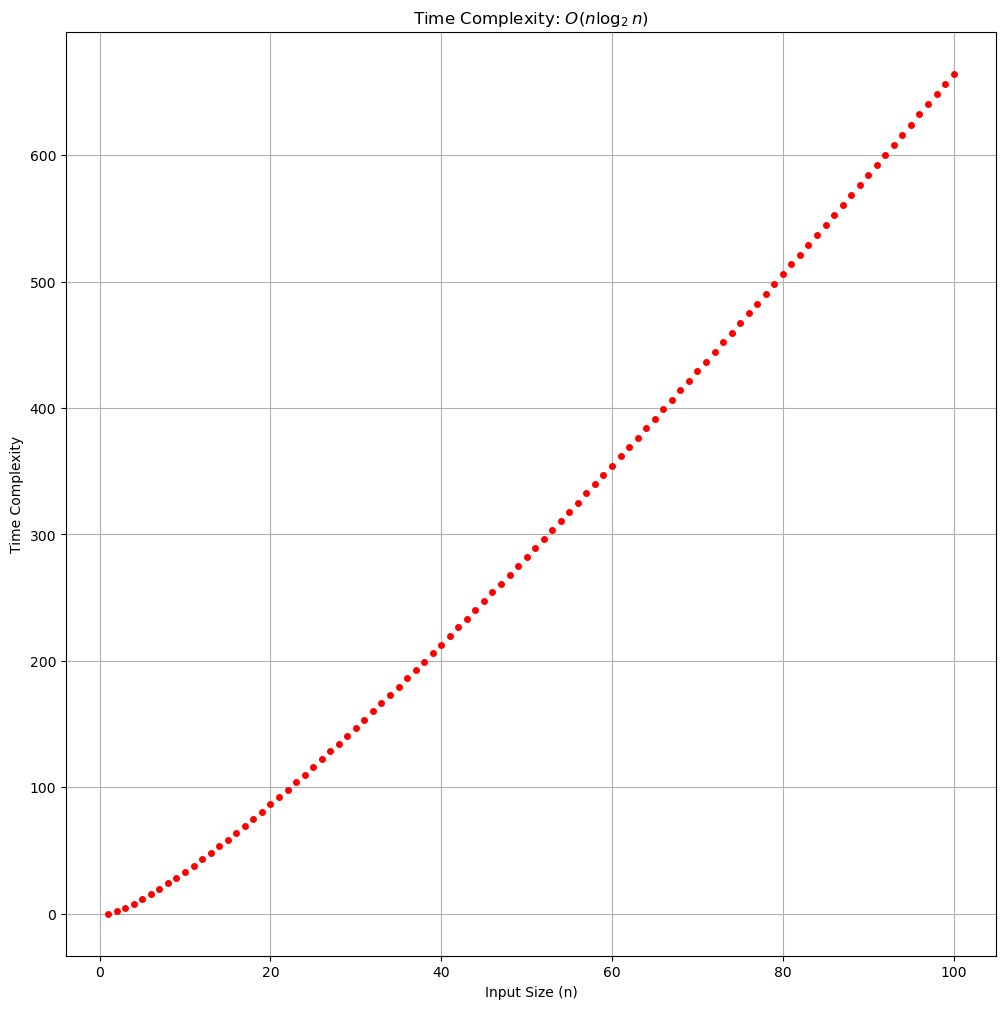

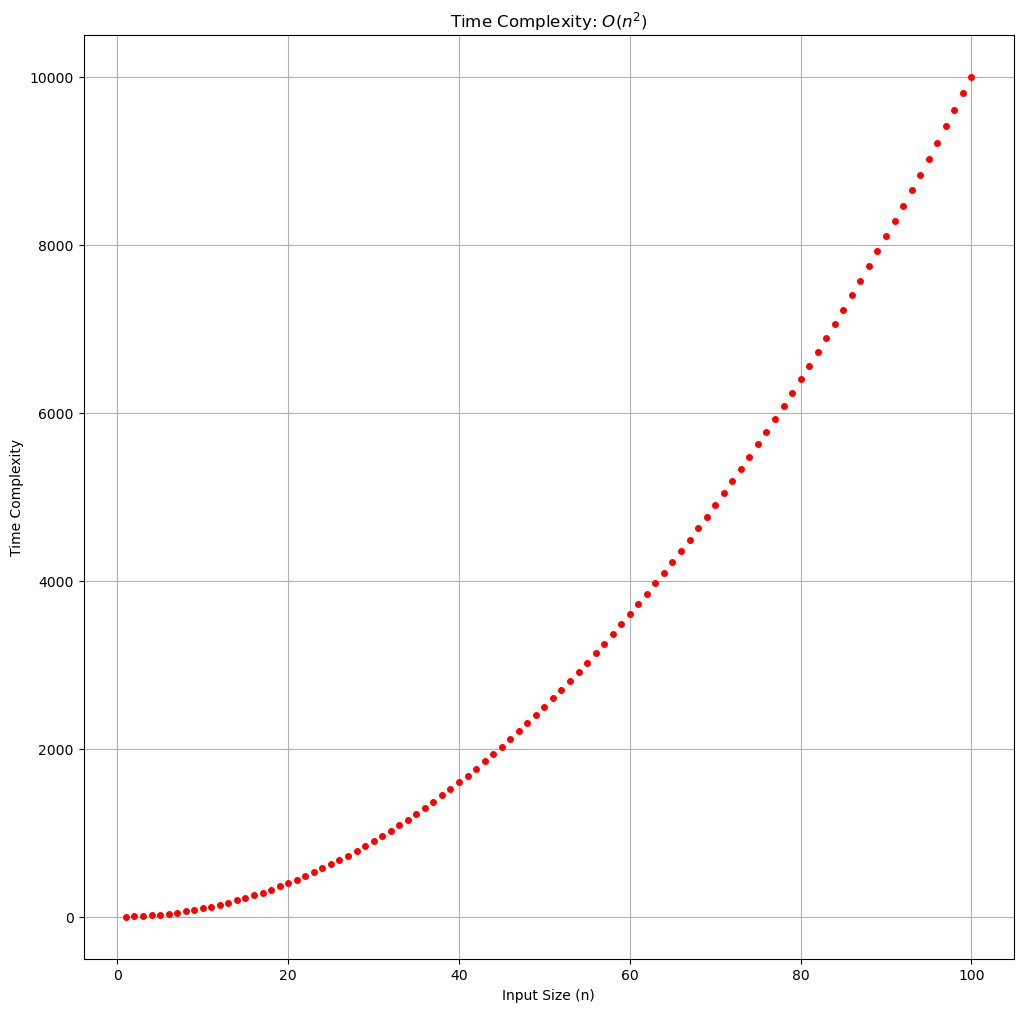

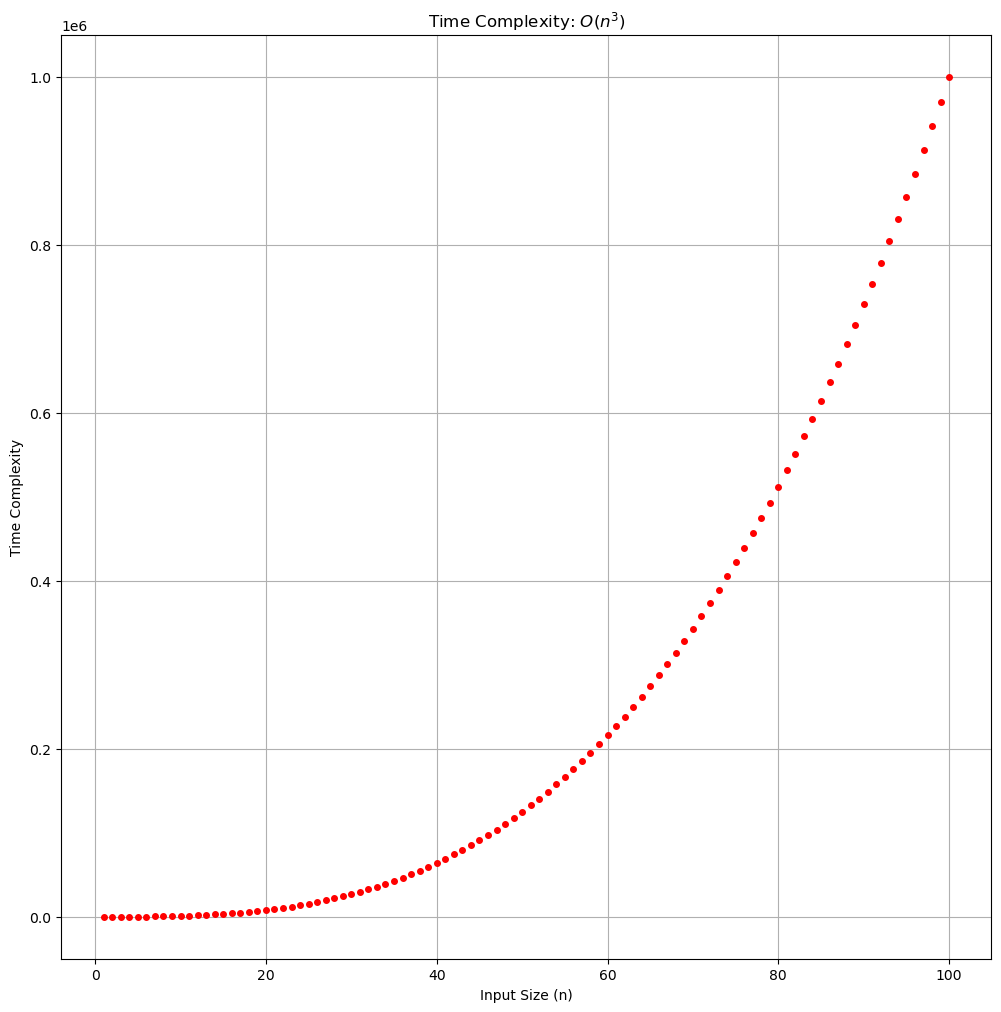

In [41]:
plt.close()
import numpy as np
#bibliothèque pour le calcul scientifique

n=100

rg = list(range(1,n+1))

def linear(l):
    
    return l

def linearithmic(l):
    return [el*np.log2(el) for el in l]


def quadratic(l):
    return [el*el for el in l]


def cubic(l):
    return [el**3 for el in l]


def log_n(l):
    return [np.log2(el) for el in l]


list_of_functions_to_run = [log_n,linear,linearithmic, quadratic,  cubic, ]
titles = ["$O(\\log_2 n)$","$O(n)$","$O(n \\log_2 n)$", "$O(n^2)$", "$O(n^3)$", ]

for i, func in enumerate(list_of_functions_to_run):

    plt.figure()
    plt.plot(rg,list_of_functions_to_run[i](rg), 'ro', markersize=4)  
    plt.title(f"Time Complexity: {titles[i]}")
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time Complexity")
    plt.grid(True)

# Show the plot
plt.show()

# 2- Algorithme de tri

------------------------------
Dans cette partie, on va reprendre les tris vus en R1.01 P2 et le traduire en Python. On en profitera pour les visualiser à l'aide d'animations (et on étudiera leur complexité dans la prochaine partie

## Tri simple, visualisations simples (les visualisations complexes sont à la toute fin du TP)

>**_question 0_**<br>
Écrire une fonction `echange` selon la spécification du TP R1.01.P2 – Semaines 47 - 48 - 49 : <br>
>><tt>Echange les contenus des cases du tableau passé en paramètre, cases identifiées par les indices ind1 et ind2.</tt>



In [42]:
def echange(tab,ind1,ind2):
    temp = 0

    temp = tab[ind1]
    tab[ind1] = tab[ind2]
    tab[ind2] = temp
        
    return tab
tab = [1,2,3,4,5]
echange(tab,0,3)
print(tab)

[4, 2, 3, 1, 5]


>**_question 1_**<br>
Écrire une fonction `triSimple` selon la spécification du TP R1.01.P2 – Semaines 47 - 48 - 49 : <br>
>><tt>Tri par ordre croissant d'un tableau selon la méthode simple : l'élément minimum est placé en début de tableau (efficacité en $n^2$). </tt>
>
>Dans le cadre du TP python, on passera uniquement le tableau `tab` (pas de paramètre nbElmt) et on triera le tableau en entier


Tester cette méthode sur des exemples

In [43]:
def minTab(tab, i, min):
    global cpt
    min = i
    
    for j in range(i, len(tab)):
        if tab[j] < tab[min]:
            min = j
    
    return min


def triSimple(tab, verb):
    global cpt
    cpt = 0
    for i in range(len(tab)):
        if verb == True:
            print(tab)
        min = i
        min = minTab(tab, i, min)
        echange(tab, i, min)
        cpt += 1

    return tab
    
tab = [3,2,1,5,3] 
triSimple([3,2,1,5,3], False)

[1, 2, 3, 3, 5]

On va maintenant essayer de mieux visualiser comment fonctionne ce tri.
Pour cela, on va utiliser des visualisation de plus en plus complexes

>**_question 2_**<br>
ajouter des `print` afin de suivre l'évolution du tableau, ainsi que le tableau restant à trier.<br>
Afin d'aleger les affichages ultérieurs, les `print` ne se feront que si le paramètre optionnel `verb` est passé à `True`

In [44]:
triSimple([3,2,1,5,3], True)
print(tab)
print(cpt)

[3, 2, 1, 5, 3]
[1, 2, 3, 5, 3]
[1, 2, 3, 5, 3]
[1, 2, 3, 5, 3]
[1, 2, 3, 3, 5]
[3, 2, 1, 5, 3]
5



>**_question 3_**<br>
ajouter un retour `ret`contenant les tableaux à chaque étape de notre algorithme.  le stokage ne se fera que si le paramètre optionnel `rec` est passé à `True`


**_Attention_** si l'on stocke le tableau quelque part, il peut continuer à évoluer (passage par référence). Il peut-être utilse d'utiliser la méthode `tab.copy()`

_Pour aller plus loin, on pourrait utiliser le mot clef `yield`. Très grossièrement, cela permettrait dans notre cas de stocker puis d'itérer sur des valeurs prises par notre programme lors de l'execution (pour plus de précision, la réponse https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do-in-python est à la fois concise et claire)_


In [45]:
tab = [3,2,1,5,3] 

rec = triSimple(tab,rec = True)
for i in rec : 
    print(i)
rec

TypeError: triSimple() got an unexpected keyword argument 'rec'

## Tableau aléatoires

Un manière de créer des tableaux aléatoires en python (en utilisant `numpy`) est la suivante : 

In [43]:
rng = np.random.default_rng()
#déclaration du générateur


mini = 0
maxi = 6

rng.integers(mini,maxi, size=10)


NameError: name 'np' is not defined

>**_question 1_**<br>
On a déclaré une variable `cpt` en <tt>global</tt>, c'est à dire qu'on peut l'utiliser à n'importe quel endroit de notre code (et que les variations sont gardées en mémoire)
Incrémentez le compteur (au bon endroit)

In [33]:
cpt = 0

triSimple([3,2,1,5,3], False)

cpt

5

>**_question 2_**<br>
Tracer la complexité en fonction de la taille du tableau à trier.

_afin de gagner en temps de calcul, on pourra utiliser `np.logspace` afin de faire évoluer les taille des tableaux à trier_

In [51]:
import numpy as np

s1= np.logspace(1, 3, num=100)
print(s1)



[  10.           10.47615753   10.97498765   11.49756995   12.0450354
   12.61856883   13.21941148   13.84886371   14.50828778   15.19911083
   15.92282793   16.68100537   17.475284     18.3073828    19.17910262
   20.09233003   21.04904145   22.0513074    23.101297     24.20128265
   25.35364494   26.56087783   27.82559402   29.15053063   30.53855509
   31.99267138   33.51602651   35.11191734   36.78379772   38.53528594
   40.37017259   42.29242874   44.30621458   46.41588834   48.6260158
   50.94138015   53.36699231   55.90810183   58.57020818   61.35907273
   64.28073117   67.34150658   70.54802311   73.90722034   77.42636827
   81.11308308   84.97534359   89.02150854   93.26033469   97.70099573
  102.35310219  107.2267222   112.3324033   117.68119524  123.28467394
  129.1549665   135.30477746  141.74741629  148.49682623  155.56761439
  162.97508346  170.73526475  178.86495291  187.38174229  196.304065
  205.65123083  215.443469    225.70197196  236.44894126  247.7076356
  259.50242

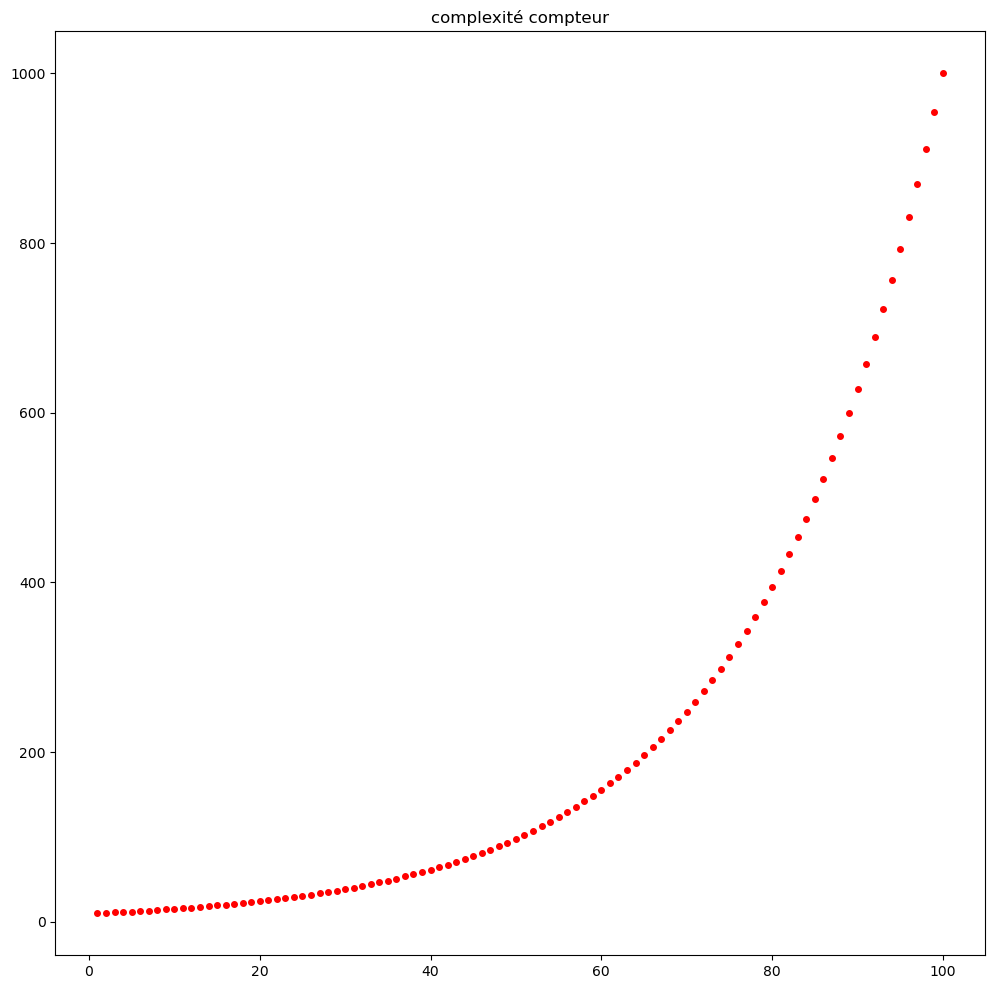

In [52]:
plt.title('complexité compteur')

plt.plot(rg, s1, 'ro', markersize=4)



plt.show()

>**_question 3_**<br>
Estimer empiriquement la complexité en traçant $cpt(n)/f(n)$ pour les fonctions $f$ de référence, et en déterminant laquelle semble la plus appropriée

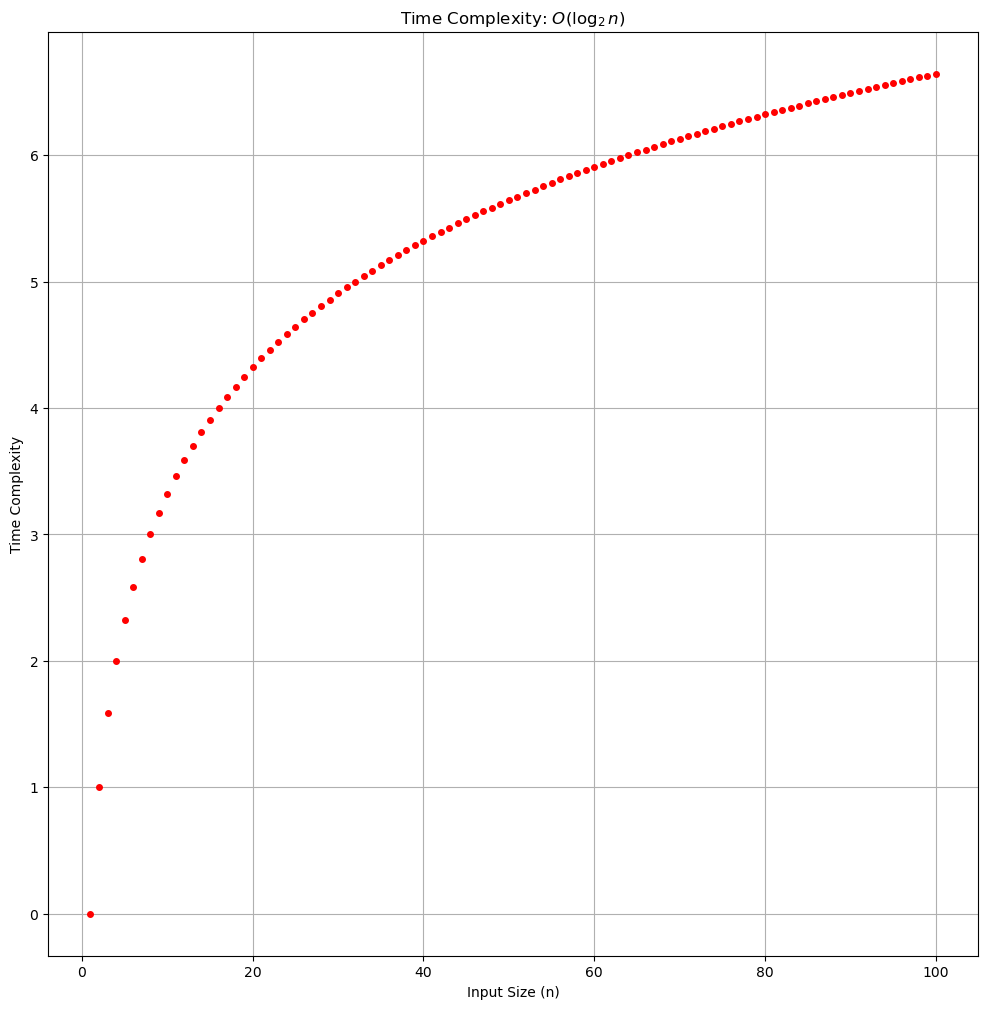

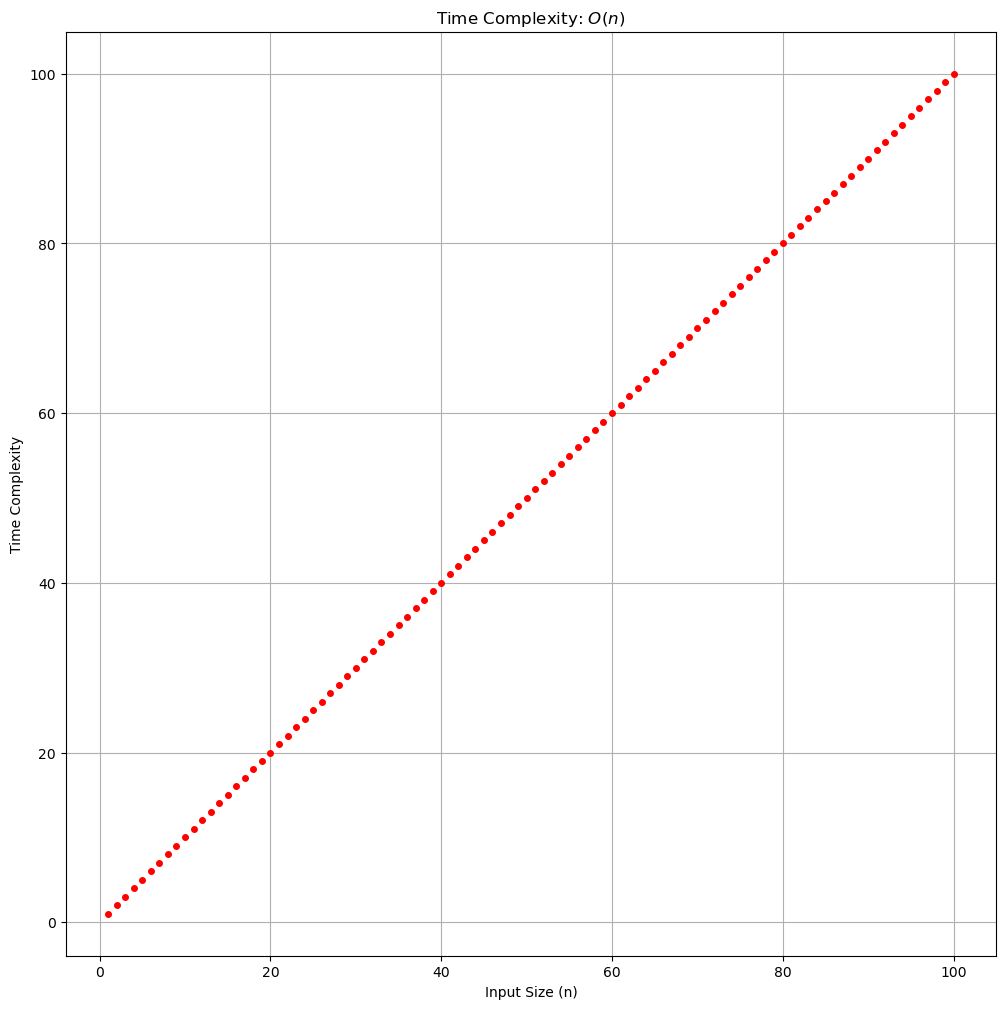

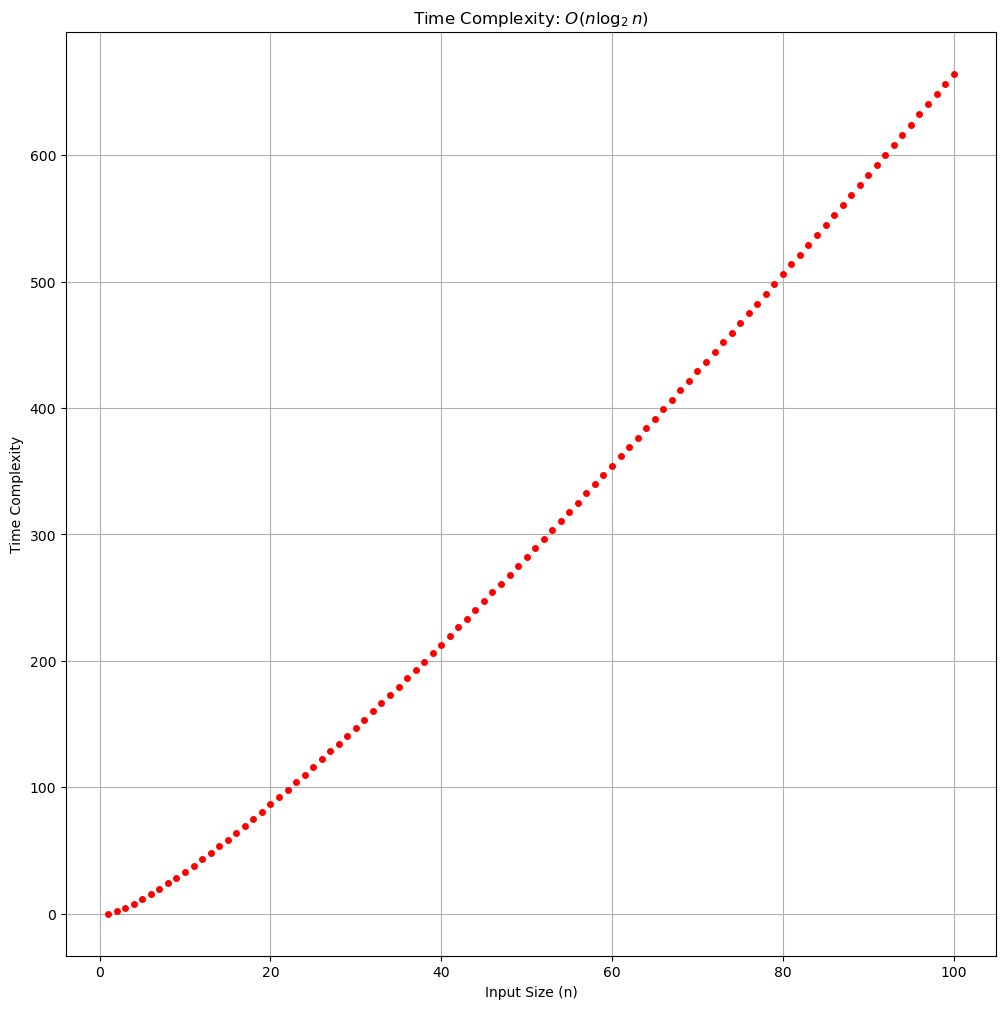

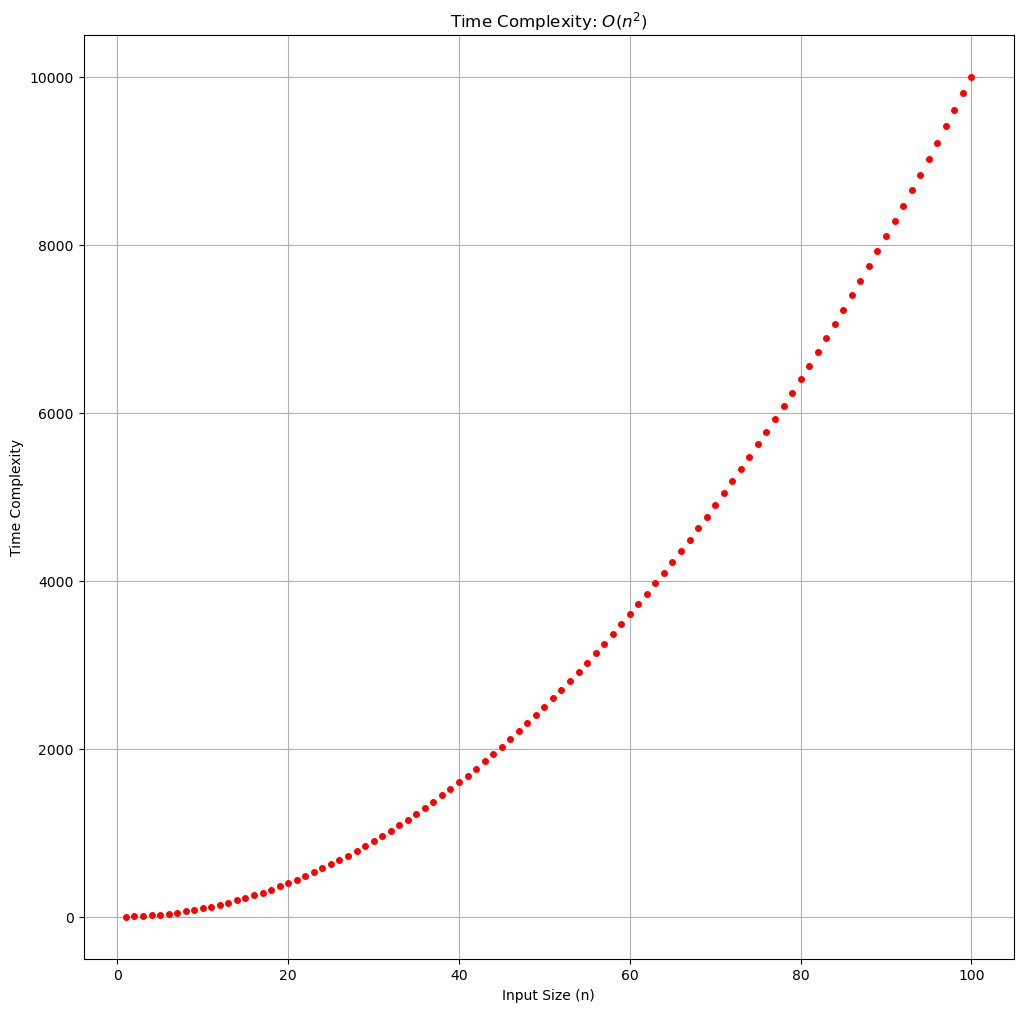

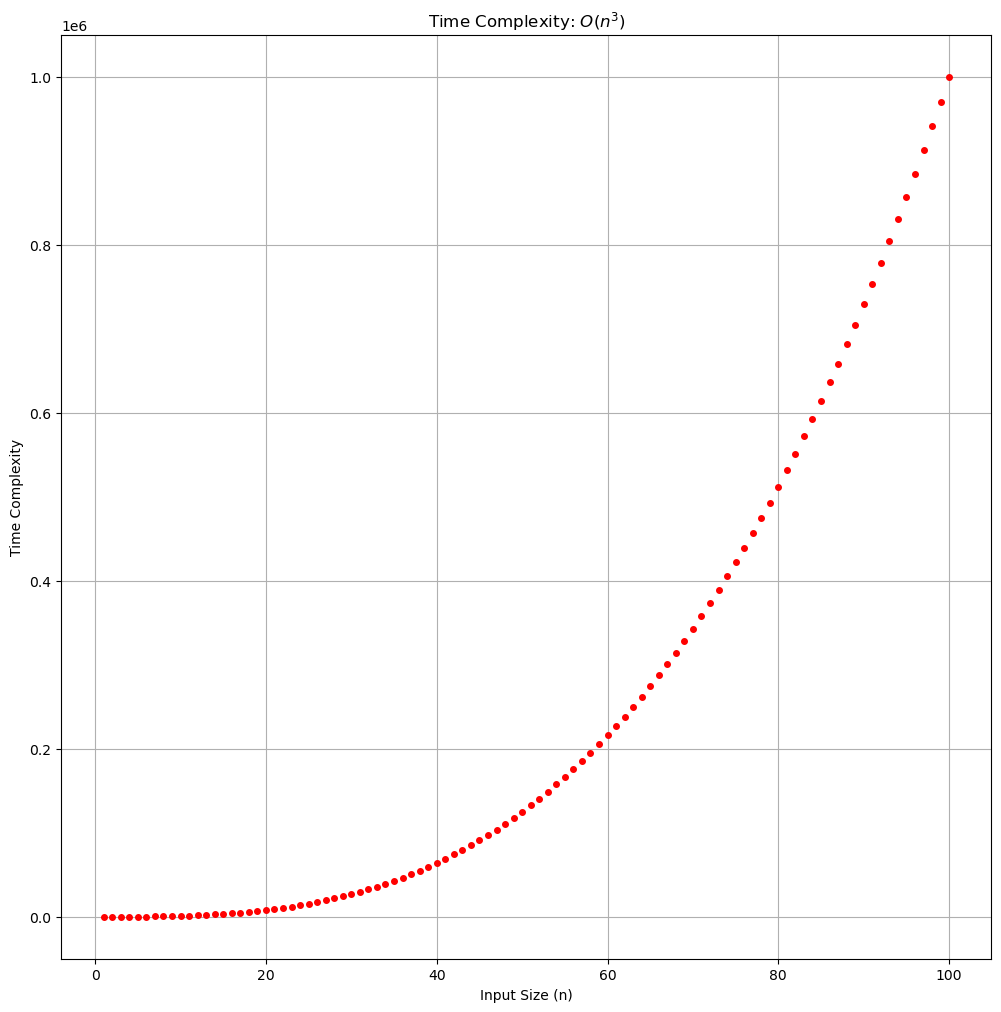

In [54]:
for i, func in enumerate(list_of_functions_to_run):

    plt.figure()

    plt.plot(rg,list_of_functions_to_run[i](rg), 'ro', markersize=4)
    
    plt.title(f"Time Complexity: {titles[i]}")
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time Complexity")
    plt.grid(True)

# Show the plot
plt.show()



## Temps

On se donne une fonction permettant de calculer le temps (moyen) necessaire pour executer une fonction de tri.

>**_question 1_**<br>
Comprendre la fonction ci-dessous et tracer le temps necessaire pour trier un tableau en fonction de la taille de celui-ci.<br>
Retrouver empiriquement la complexité de l'algorithme
<br>
Expliquer pourquoi il n'est pas intéressant de tracer le temps et $f : x \mapsto x^2$ sur le même graphe (même s'il s'agit de la bonne complexité).

In [58]:
import time


def tps_sort_randarray(fct,n):
    
    tab = rng.integers(0,6, size=int(n))
    tab[-1] = -1
    
    k = 10
    meantime=0
    for i in range(k): #averaging the time
        start_time = time.time()
        fct(rng.integers(0,6, size=int(n)))
        end_time = time.time()   
        meantime = (end_time - start_time)

    return meantime/k
    

    

In [56]:
rg=np.logspace(2.25,3.15, num = 50)


t1 = [tps_sort_randarray(triSimple, int(n)) for n in rg]

NameError: name 'rng' is not defined

In [57]:
 plt.plot(rg,t1, 'bo', markersize=4)  

NameError: name 't1' is not defined

### Visualisation avancée

Ci-dessous un snippet permettant de créer des animations en python. Vous pouvez essayer de le comprendre mais cela dépasse le cadre de notre introduction

In [59]:
plt.close("all")

#https://pythonalgos.com/2021/12/21/create-beautiful-sorting-animations-in-python/

from matplotlib.animation import FuncAnimation, PillowWriter

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
 
def animate(_list, generator, title, save, save_frames=1000):
    n = len(_list)
    fig, ax = plt.subplots()
    ax.set_title(title)
 
    bar_rects = ax.bar(range(len(_list)), _list, align="edge")  
    ax.set_xlim(0, n)
    ax.set_ylim(0, int(1.1*n))
    text = ax.text(0.01, 0.95, "", transform = ax.transAxes)
    iteration = [0]
    def _animate(array, rects, iteration):
        for rect, val in zip(rects, array):
            rect.set_height(val)
        iteration[0] += 1
        text.set_text(f"iterations: {iteration[0]}")
   
    anim = FuncAnimation(fig, func=_animate,
        fargs=(bar_rects, iteration), frames=generator, interval=10,
        repeat=False, save_count=save_frames)
    if save:
        
        writer = PillowWriter(fps=30)
        anim.save(title + ".gif", writer=writer)
    else : 
        return anim


In [60]:
array = list(range(50))
random.shuffle(array) #mélange du tableau (voir la doc)
anim = animate(array, triSimple(array,rec=True), "tri simple", False)
HTML(anim.to_jshtml())

TypeError: triSimple() got an unexpected keyword argument 'rec'

# Et avec d'autres tris ?

>**_question_**<br>
Écrire une fonction `triBulle` selon la spécification du TP R1.01.P2 – Semaines 47 - 48 - 49 : <br>
>><tt>Tri par ordre croissant d'un tableau selon la méthode du tri à bulles : tant que le tableau n'est pas trié, permuter le contenu de 2 cases successives si leTab[i] > leTab[i+1] </tt>
>
>Dans le cadre du TP python, on passera uniquement le tableau `tab` (pas de paramètre nbElmt) et on triera le tableau en entier
>Comme pour le `TriSimple`, visualiser le tri.



>**_question_**<br>
Reprendre l'étude de complexité avec le tri par bulle


In [62]:
plt.close("all")

 
def bubblesort(arr) :
    global cpt
    cpt = 0

    return -1
tab = [3,2,1,5,3] 
aa = bubblesort(tab)
for i in aa : 
    print(i)

[2, 3, 1, 5, 3]
[2, 1, 3, 5, 3]
[2, 1, 3, 3, 5]
[1, 2, 3, 3, 5]


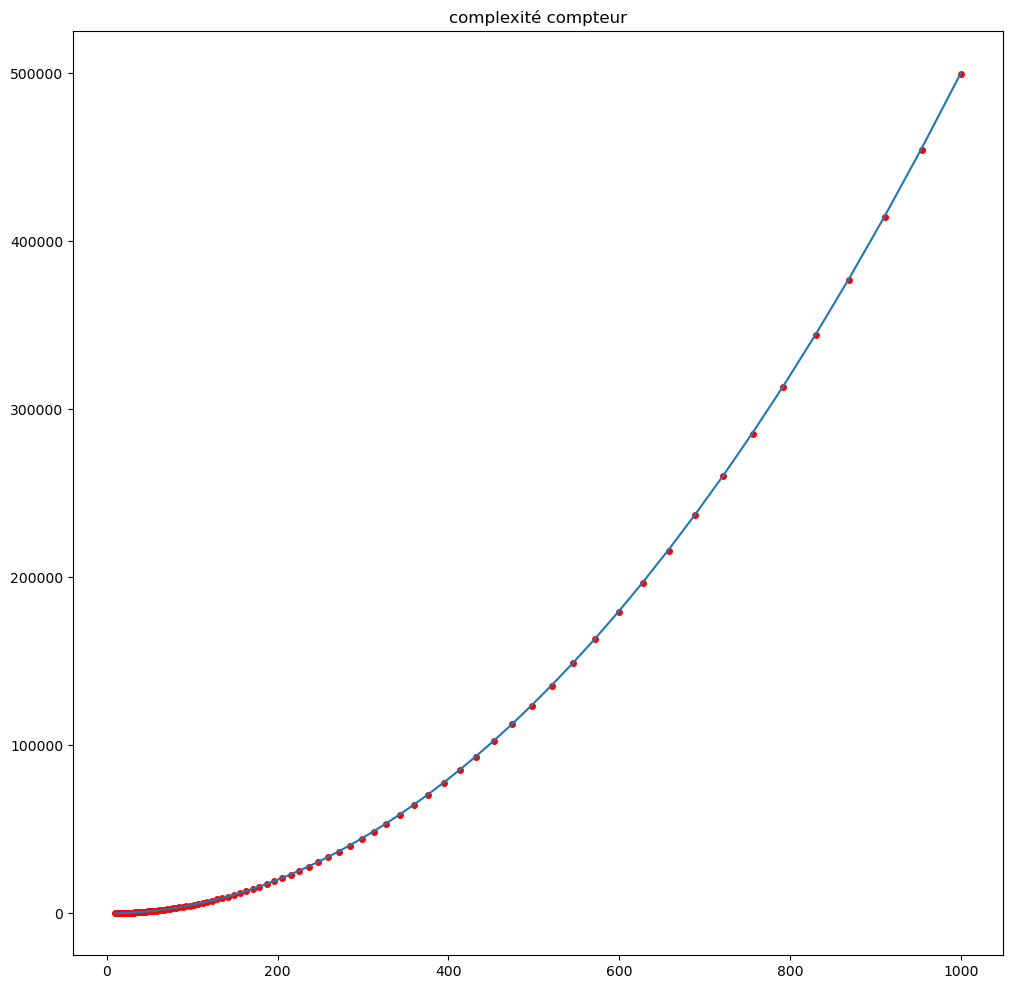

In [86]:
plt.title('complexité compteur')

plt.plot(rg, s2, 'ro', markersize=4)
#plt.plot(rg, rt, markersize=4)


plt.show()

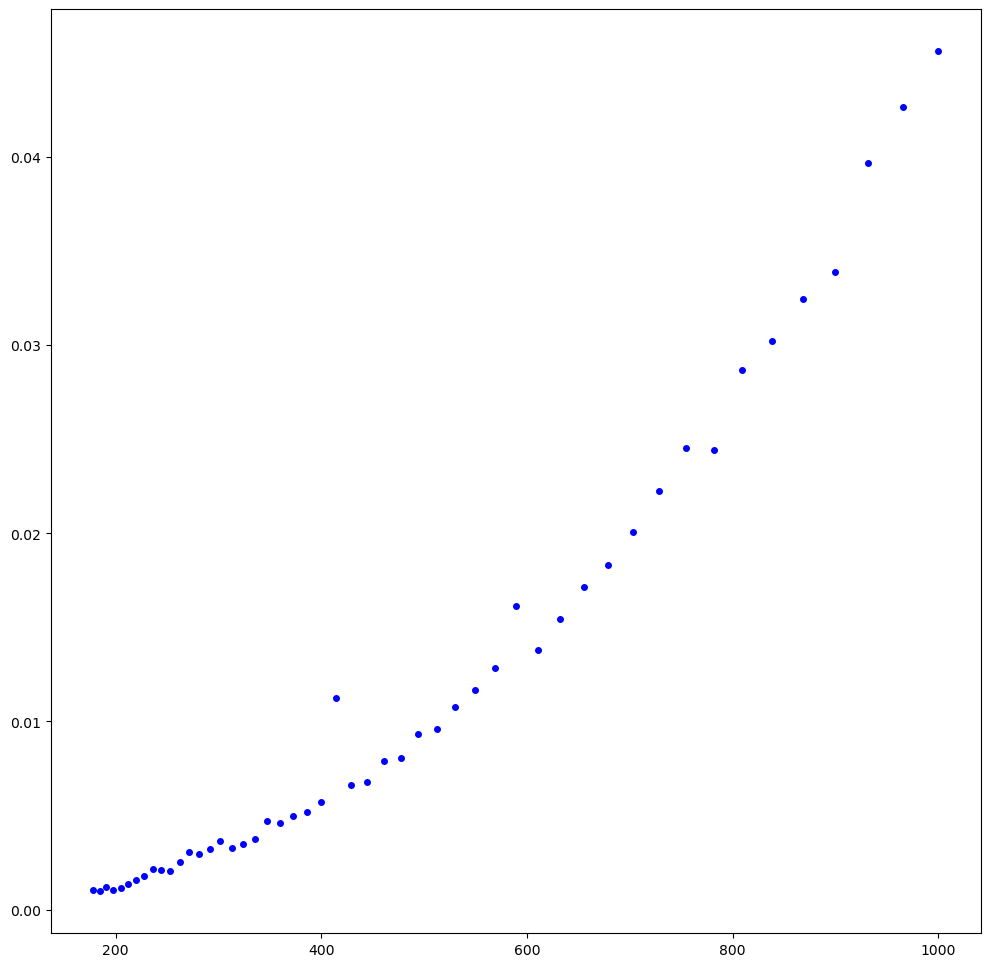

In [89]:
plt.plot(rg,t2, 'bo', markersize=4)  

On peut essayer avec des algorithmes que vous n'avez pas vu en cours : 

>**_question_**<br>
Visualiser et essayer de comprendre les deux tris suivant :


_source :_ [wikibook](https://en.wikibooks.org/wiki/Algorithm_Implementation/Sorting/Gnome_sort)

In [90]:
def gnomeSort(items,count = False) :
    global cpt
    cpt = 0
    i = 0
    n = len(items)
    ret = []
    while i < n:
        if i and items[i] < items[i-1]:
            echange(items,i-1,i)
            i -= 1
        else:
            i += 1
        ret.append(items.copy())
        cpt = cpt+1
    if count :            
        return ret, cpt
    else :
        return ret

def teleportingGnomeSort(items,count = False):
    i = j = 0
    n = len(items)
    ret = []
    global cpt
    cpt = 0
    while i < n:
        if i and items[i] < items[i-1]:
            echange(items,i-1,i)
            i -= 1
        else:
            if i < j: # teleport!
                i = j
            j = i = i+1
        ret.append(items.copy())
            
        cpt = cpt+1
    if count :            
        return ret, cpt
    else :
        return ret

tab = [3,2,1,5,3] 

array = [i for i in range(10)]
random.shuffle(array)

gnomeSort(array)
array

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

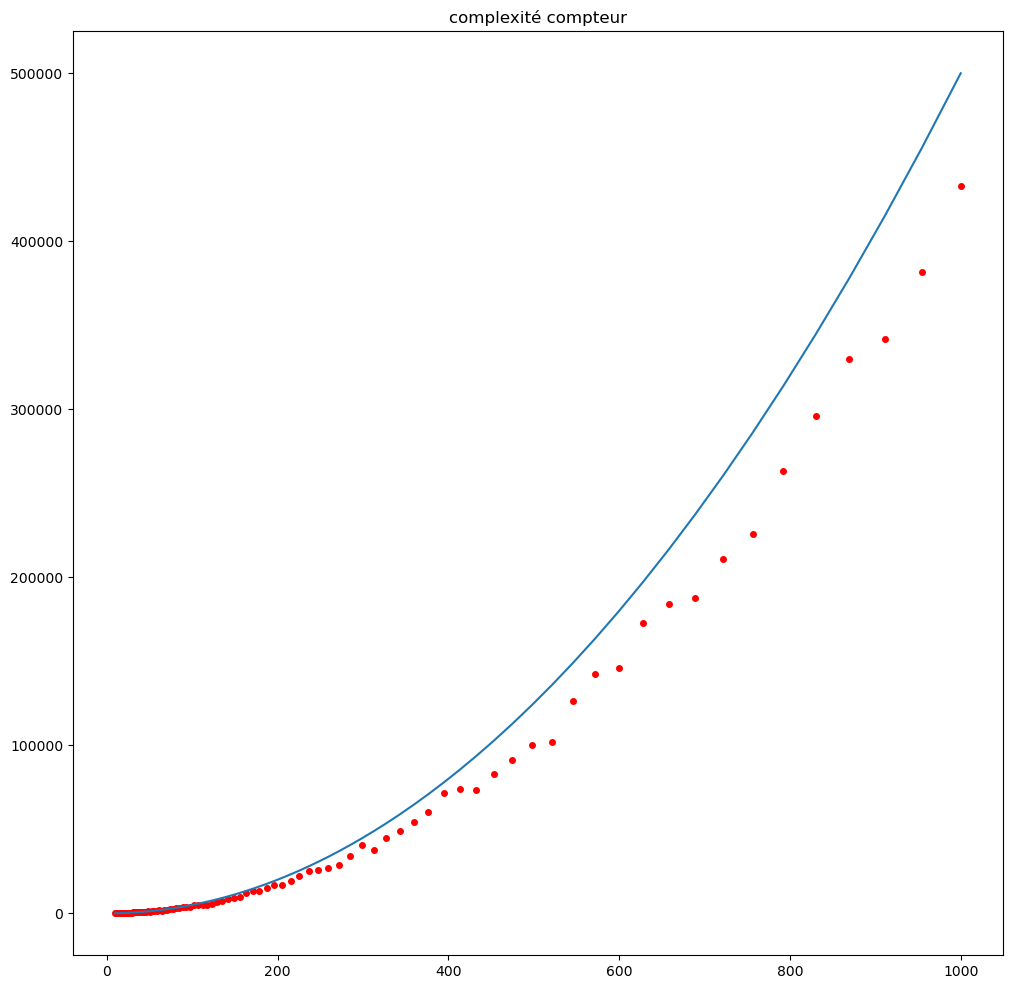

In [92]:
plt.title('complexité compteur')



plt.show()